In [22]:
import setup
import iohelper.results as rio
from iohelper import hamiltonians
from multiprocessing import Pool
from kandala_circuit import kandala_circuit
from algo.cvqe_wrapper import CVqe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Общий код

In [46]:
def run_vqe(params):
    n_layers, circ = params
    vqe_r = cvqe.optimize(circ)
    num_ev = vqe_r.num_evaluations
    print('Num of layers is {}, {} evals'.format(n_layers, num_ev))
    return (n_layers, vqe_r)

def generate_dataframe(save_name):
    r = rio.load('data-vqe', save_name)
    n_qubits = r[0][1].circ.num_qubits
    task = hamiltonians.for_qubits(n_qubits)
    
    records = []
    for n_layers, vqe_r in r:
        records.append((n_layers, n_layers * (n_qubits - 1), vqe_r.opt_value, vqe_r.opt_value - task.min_eigenvalue))
        
    df = pd.DataFrame.from_records(records, columns=['n_layers', 'n_cnots', 'energy', 'gse_proximity'])
    df.to_csv('output/{}.csv'.format(save_name))

def vqe_fixed_circuit(n_qubits, max_layers, vqe_tol, save_name):
    task = hamiltonians.for_qubits(n_qubits)
    cvqe = CVqe(task.H, vqe_tol)

    with Pool() as p:
        n_circuits_list = [(i, kandala_circuit(task.N, task.classical_psi0, i)) for i in range(0, max_layers + 1) for _ in range(20)]
        r = list(p.map(run_vqe, n_circuits_list))
        rio.store('data-vqe', save_name, r)
        generate_dataframe(save_name)


# 4 кубита

In [21]:
vqe_fixed_circuit(n_qubits = 4, max_layers = 4, vqe_tol = 1e-15, save_name = '4-vqe')

Num of layers is 0, 2960 evals
Num of layers is 0, 2560 evals
Num of layers is 0, 2960 evals
Num of layers is 0, 2960 evals
Num of layers is 0, 2960 evals
Num of layers is 0, 2960 evals
Num of layers is 0, 2960 evals
Num of layers is 0, 2590 evals
Num of layers is 0, 2990 evals
Num of layers is 0, 2590 evals
Num of layers is 0, 2590 evals
Num of layers is 0, 3490 evals
Num of layers is 0, 2790 evals
Num of layers is 0, 2790 evals
Num of layers is 0, 2690 evals
Num of layers is 0, 2680 evals
Num of layers is 0, 2540 evals
Num of layers is 0, 2540 evals
Num of layers is 0, 2710 evals
Num of layers is 0, 2870 evals
Num of layers is 1, 14244 evals
Num of layers is 1, 14220 evals
Num of layers is 1, 10956 evals
Num of layers is 1, 10620 evals
Num of layers is 1, 16008 evals
Num of layers is 1, 21204 evals
Num of layers is 1, 8004 evals
Num of layers is 1, 26808 evals
Num of layers is 1, 13200 evals
Num of layers is 1, 10716 evals
Num of layers is 2, 10626 evals
Num of layers is 1, 13524 eva

# 8 кубитов

In [ ]:
vqe_fixed_circuit(n_qubits = 8, max_layers = 7, vqe_tol = 1e-5, save_name = '8-vqe')

In [49]:
rs = rio.load('data-vqe', '8-vqe')
c = next(r.circ for nl, r in rs if r.opt_value - hamiltonians.q8.min_eigenvalue < 1.6e-3)


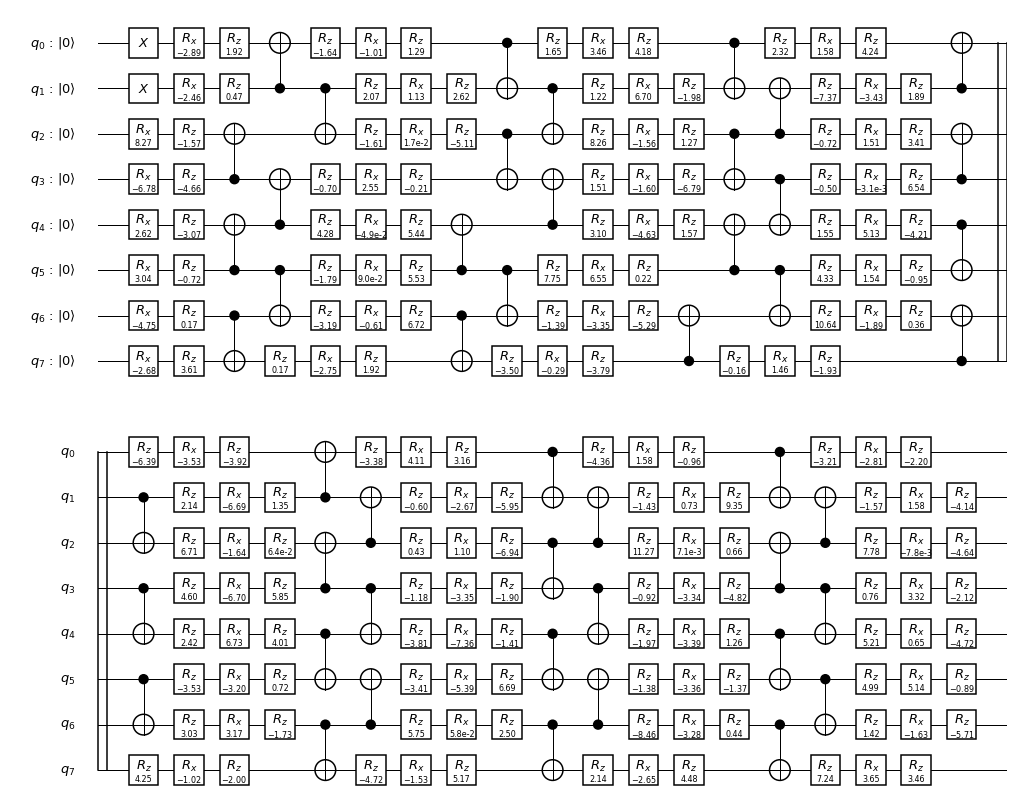

In [54]:
from circuit import QCircuitConversions
QCircuitConversions.to_qiskit_circuit(c).draw(output='mpl', style = {'fold': 19})